In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.preprocessing
import torch
import torchvision
import torchvision.datasets
import torchvision.models
import torchvision.transforms

In [2]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']  # Hay 1797 digitos representados en imagenes 8x8
n_imagenes = len(imagenes)
X = imagenes.copy()
Y = numeros['target']

In [3]:
inputs = torch.autograd.Variable(torch.Tensor(X).float()).unsqueeze(1)

In [4]:
mean = inputs.mean(dim=0)
std = inputs.std(dim=0)
std[std==0]=1.0

for i in range(len(inputs)):
    inputs[i] = (inputs[i])/std
np.shape(inputs)

torch.Size([1797, 1, 8, 8])

In [31]:
loss_list = []
N_C = []
for i in np.arange(1,10,1):
    print(i)
    class Autoencoder(torch.nn.Module):
        def __init__(self):
            super(Autoencoder,self).__init__()
            self.encoder = torch.nn.Sequential(
                torch.nn.Conv2d(1, 25, kernel_size=3),
                torch.nn.Conv2d(25,8,kernel_size=3),
                torch.nn.Conv2d(8,i,kernel_size=3))
            self.decoder = torch.nn.Sequential(
                torch.nn.ConvTranspose2d(i,8,kernel_size=3),
                torch.nn.ConvTranspose2d(8,25,kernel_size=3),
                torch.nn.ConvTranspose2d(25,1,kernel_size=3))
        def forward(self,x):
            x = self.encoder(x)
            x = self.decoder(x)
            return x
    num_epochs = 100
    model = Autoencoder()
    distance = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=1E-4)

    for epoch in range(num_epochs):
        output = model(inputs)
        loss = distance(output, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if(epoch == (num_epochs - 1)):
            loss_list.append(loss.item())
        
    x_transform = model(inputs)
    latent_space = model.encoder(inputs)

    n_p = 0
    for m in model.parameters():
        n_p += m.flatten().size()[0]
    N_C.append(n_p)

1
2
3
4
5
6
7
8
9


Text(0, 0.5, 'N_C')

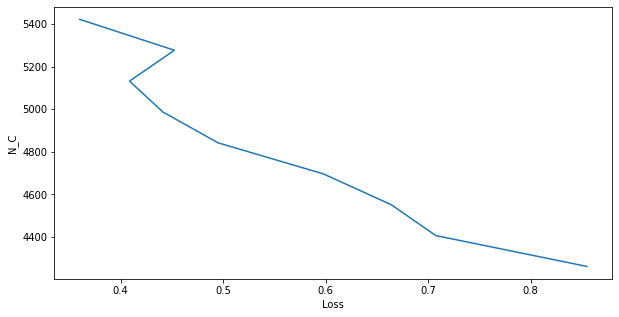

In [41]:
plt.figure(figsize = (10,5))
plt.plot(loss_list,N_C)
plt.xlabel('Loss')
plt.ylabel('N_C')

Text(0, 0.5, 'N_L')

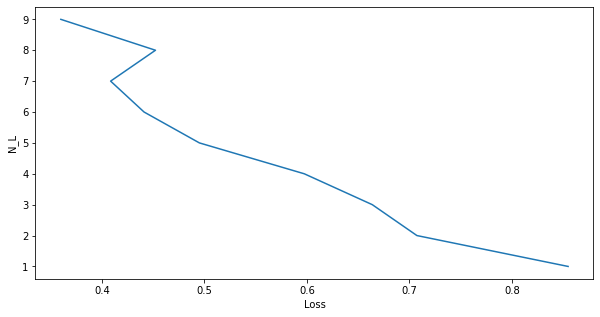

In [42]:
plt.figure(figsize = (10,5))
plt.plot(loss_list,np.arange(1,10,1))
plt.xlabel('Loss')
plt.ylabel('N_L')

Text(0, 0.5, 'N_C')

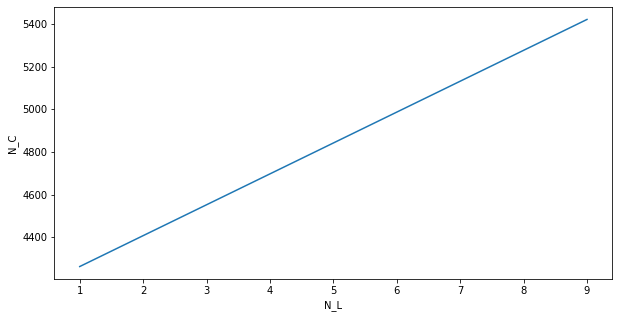

In [43]:
plt.figure(figsize = (10,5))
plt.plot(np.arange(1,10,1),N_C)
plt.xlabel('N_L')
plt.ylabel('N_C')